In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report

# loading data

In [3]:
titanic = pd.read_csv('Titanic-DS.csv')
print(titanic.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [4]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# EDA
Plotting the survival rate

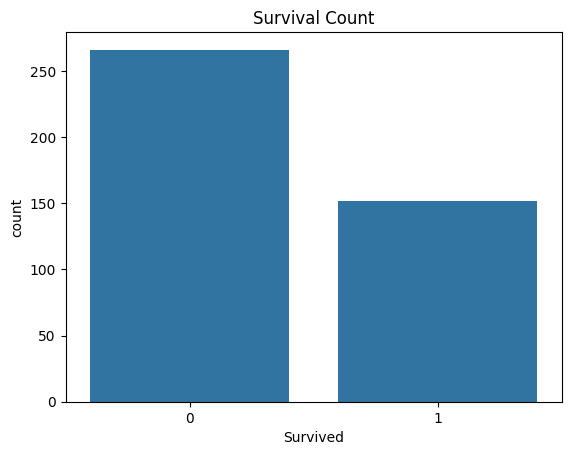

In [5]:
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.show()

# data pre-processing

In [6]:
titanic = titanic.copy()  # Create a copy 
if 'Age' in titanic.columns:
    titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
if 'Embarked' in titanic.columns:
    titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [7]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
titanic = titanic.fillna(0)

In [9]:
titanic = pd.get_dummies(titanic, drop_first=True)
print(titanic.head())
print(titanic.dtypes)

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0          892         0       3  34.5      0      0   7.8292   
1          893         1       3  47.0      1      0   7.0000   
2          894         0       2  62.0      0      0   9.6875   
3          895         0       3  27.0      0      0   8.6625   
4          896         1       3  22.0      1      1  12.2875   

   Name_Abelseth, Miss. Karen Marie  Name_Abelseth, Mr. Olaus Jorgensen  \
0                             False                               False   
1                             False                               False   
2                             False                               False   
3                             False                               False   
4                             False                               False   

   Name_Abrahamsson, Mr. Abraham August Johannes  ...  Cabin_F  Cabin_F E46  \
0                                          False  ...    False        False   


# Model Building

In [10]:
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy=',accuracy)
print('precision=',precision)
print('recall=',recall)
print('f1=',f1)

Accuracy= 1.0
precision= 1.0
recall= 1.0
f1= 1.0


In [13]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[50  0]
 [ 0 34]]


In [14]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

